# 利用python进行数据分析

## 导入必要的库

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## 配置全局设置

In [44]:
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.sans-serif"] = ["SimHei"]

## 载入数据

In [22]:
jd_data = pd.DataFrame(pd.read_csv("jd_comment_data.csv", encoding="gbk"))
jd_data["购买时间"] = pd.to_datetime(jd_data["购买时间"])
jd_data["评论时间"] = pd.to_datetime(jd_data["评论时间"])
jd_data["会员等级"] = jd_data["会员等级"].astype(str)

In [23]:
jd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   商品ID    13576 non-null  int64         
 1   用户ID    13576 non-null  int64         
 2   会员等级    13576 non-null  object        
 3   总打分数    13576 non-null  int64         
 4   总回复数    13576 non-null  int64         
 5   购买时间    13576 non-null  datetime64[ns]
 6   评论时间    13576 non-null  datetime64[ns]
 7   评论天数间隔  13576 non-null  int64         
 8   打分      13576 non-null  int64         
 9   商品名称    13576 non-null  object        
 10  评论内容    13576 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 1.1+ MB


In [24]:
jd_data.head()  # tail()

,商品ID,用户ID,会员等级,总打分数,总回复数,购买时间,评论时间,评论天数间隔,打分,商品名称,评论内容
0,100008847233,16173978325,201,4,20,2021-08-15 00:12:00,2021-08-21 17:30:00,6,5,海信(Hisense) 舒适家 3匹 新一级能效 智能自清洁三匹立式柜机客厅空调 京东小家智...,线上线下看了好几款空调，最后选择了海信空调，外观精致，性价比很高，空调到货后包装完好，师傅安...
1,100008847233,16113041317,201,0,6,2021-06-18 15:07:00,2021-08-10 07:30:00,53,5,海信(Hisense) 舒适家 3匹 新一级能效 智能自清洁三匹立式柜机客厅空调 京东小家智...,这款空调超级棒！制冷效果十分给力，我们家客厅大，没想到3匹的也是完全够的，空调样式美观，大气...
2,100008847233,16695923570,201,3,1,2021-10-26 23:10:00,2021-11-21 10:43:00,26,5,海信(Hisense) 舒适家 3匹 新一级能效 智能自清洁三匹立式柜机客厅空调 京东小家智...,外形外观：对于人丑还颜控的我来说绝了，不管那种装修风格都适合，金属粉？反正超级好看\n冷暖效...
3,100008847233,17333759320,201,0,1,2022-03-30 14:33:00,2022-04-05 15:57:00,6,5,海信(Hisense) 舒适家 3匹 新一级能效 智能自清洁三匹立式柜机客厅空调 京东小家智...,?外观颜值：整体比较小巧的圆柱体，金粉色和白的配色，挺好看的。\n\n?安装配送：包装完好，...
4,100008847233,17228447031,0,0,2,2022-03-05 17:15:00,2022-03-09 11:13:00,4,5,海信(Hisense) 舒适家 3匹 新一级能效 智能自清洁三匹立式柜机客厅空调 京东小家智...,外形外观：圆柱的，看起来大气，不占地方\n冷暖效果：制热很快，十几分钟就能感受到屋里的热气\...


In [25]:
jd_data.describe()

,商品ID,用户ID,总打分数,总回复数,评论天数间隔,打分
count,1.357600e+04,1.357600e+04,13576.000000,13576.000000,13576.000000,13576.000000
mean,1.000176e+11,1.752130e+10,0.825648,1.453889,12.041544,3.080731
std,5.474217e+06,6.424179e+08,4.711729,12.107855,17.489934,1.917094
min,1.000088e+11,1.456947e+10,0.000000,0.000000,0.000000,1.000000
25%,1.000136e+11,1.758129e+10,0.000000,0.000000,3.000000,1.000000
50%,1.000194e+11,1.778386e+10,0.000000,1.000000,5.000000,3.000000
75%,1.000194e+11,1.792733e+10,0.000000,1.000000,13.000000,5.000000
max,1.000322e+11,1.797185e+10,209.000000,593.000000,290.000000,5.000000


## 数据预处理

In [26]:
# 数据去重
jd_data.drop_duplicates(subset=None, keep='first', inplace=True)
jd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10877 entries, 0 to 13575
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   商品ID    10877 non-null  int64         
 1   用户ID    10877 non-null  int64         
 2   会员等级    10877 non-null  object        
 3   总打分数    10877 non-null  int64         
 4   总回复数    10877 non-null  int64         
 5   购买时间    10877 non-null  datetime64[ns]
 6   评论时间    10877 non-null  datetime64[ns]
 7   评论天数间隔  10877 non-null  int64         
 8   打分      10877 non-null  int64         
 9   商品名称    10877 non-null  object        
 10  评论内容    10877 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 1019.7+ KB


In [27]:
# 数据去噪(评论内容为空的)
jd_data[jd_data["评论内容"]=="此用户未填写评价内容"].shape

(1293, 11)

In [28]:
# 删除评论内容为空的记录
jd_data.drop(jd_data[jd_data["评论内容"]=="此用户未填写评价内容"].index, inplace=True)
jd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9584 entries, 0 to 13575
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   商品ID    9584 non-null   int64         
 1   用户ID    9584 non-null   int64         
 2   会员等级    9584 non-null   object        
 3   总打分数    9584 non-null   int64         
 4   总回复数    9584 non-null   int64         
 5   购买时间    9584 non-null   datetime64[ns]
 6   评论时间    9584 non-null   datetime64[ns]
 7   评论天数间隔  9584 non-null   int64         
 8   打分      9584 non-null   int64         
 9   商品名称    9584 non-null   object        
 10  评论内容    9584 non-null   object        
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 898.5+ KB


In [29]:
# 会员等级字段名称映射
vip_list = "注册会员 铜牌会员 银牌会员 Plus会员 金牌会员".split()
vip_dict = dict(zip({"0", "101", "103", "201", "203"}, vip_list))
jd_data["会员等级"] = jd_data["会员等级"].map(vip_dict)
jd_data["会员等级"].value_counts()

铜牌会员      4186
银牌会员      3636
Plus会员    1065
注册会员       680
金牌会员        16
Name: 会员等级, dtype: int64

In [32]:
# 查看哪些列存在空置
jd_data.isnull().any()

商品ID      False
用户ID      False
会员等级      False
总打分数      False
总回复数      False
购买时间      False
评论时间      False
评论天数间隔    False
打分        False
商品名称      False
评论内容      False
dtype: bool

In [33]:
jd_data["会员等级"].fillna("其他会员", inplace=True)

## 数据分析

### 会员等级分布

In [35]:
# 查看枚举值
vip_cnt = jd_data["会员等级"].value_counts()
print(vip_cnt)

铜牌会员      4186
银牌会员      3636
Plus会员    1065
注册会员       680
金牌会员        16
其他           1
Name: 会员等级, dtype: int64


In [38]:
ratio = vip_cnt / sum(vip_cnt)
ratio

铜牌会员      0.436770
银牌会员      0.379382
Plus会员    0.111123
注册会员      0.070952
金牌会员      0.001669
其他        0.000104
Name: 会员等级, dtype: float64

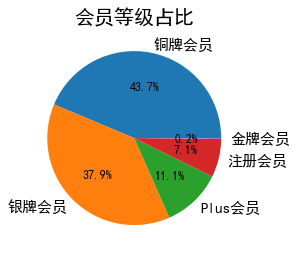

In [91]:
def plot_pie(obj_cnt, title):
    ratio = obj_cnt / sum(obj_cnt)
    ratio_filter = ratio[ratio > 0.001]
    _, l_text, p_text = plt.pie(ratio_filter, labels=ratio_filter.index, normalize=False, autopct="%1.1f%%")
    plt.title(title, size=20)
    # 设置图表文本字体
    for t in p_text:
        t.set_size(12)
    for t in l_text:
        t.set_size(15)
    plt.show()
    
plot_pie(vip_cnt, "会员等级占比")

### 购买时间分布分析

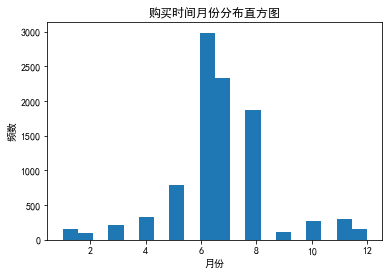

In [84]:
buy_datetime = jd_data["购买时间"].dt
plt.hist(buy_datetime.month, bins=20)
plt.xlabel("月份")
plt.ylabel("频数")
plt.title("购买时间月份分布直方图")
plt.show()

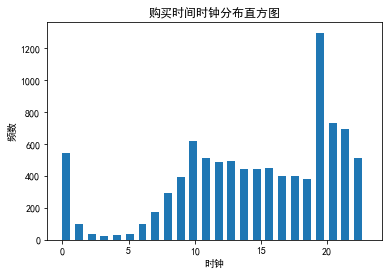

In [56]:
plt.hist(buy_datetime.hour, bins=24, width=0.6)
plt.xlabel("时钟")
plt.ylabel("频数")
plt.title("购买时间时钟分布直方图")
plt.show()

从上图看出，20点购买空调的人数最多，可能是京东某些活动的开始时间。

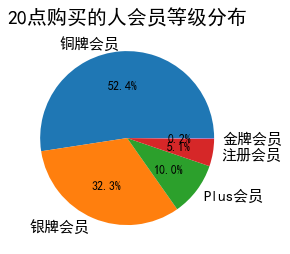

In [88]:
# 20点购买的人会员等级分布
buy_20_cnt = jd_data[buy_datetime.hour==20]["会员等级"].value_counts()
plot_pie(buy_20_cnt, "20点购买的人会员等级分布")

### 评论时间分布分析

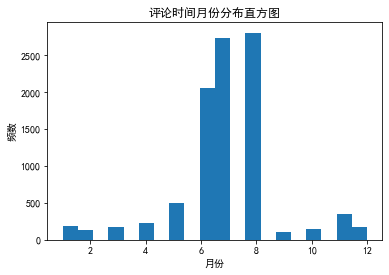

In [60]:
comment_datetime = jd_data["评论时间"].dt
plt.hist(comment_datetime.month, bins=20)
plt.xlabel("月份")
plt.ylabel("频数")
plt.title("评论时间月份分布直方图")
plt.show()

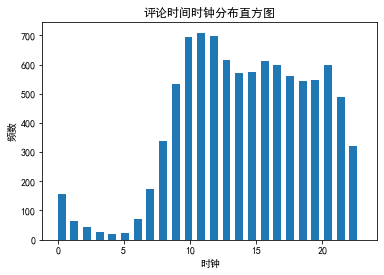

In [61]:
plt.hist(comment_datetime.hour, bins=24, width=0.6)
plt.xlabel("时钟")
plt.ylabel("频数")
plt.title("评论时间时钟分布直方图")
plt.show()

### 购买评论天数间隔分析

In [62]:
days = jd_data["评论天数间隔"].sort_values()
days

10497      0
9019       0
9118       0
466        0
7646       0
        ... 
7994     217
2782     251
11841    251
11851    251
9955     290
Name: 评论天数间隔, Length: 9584, dtype: int64

In [63]:
days.quantile([0.01, 0.1, 0.5, 0.8, 0.9, 0.99])

0.01     1.00
0.10     2.00
0.50     7.00
0.80    20.00
0.90    36.00
0.99    71.17
Name: 评论天数间隔, dtype: float64

In [64]:
days_cnt = days[days < 72].value_counts()
days_cnt

3     1062
2     1037
4      878
5      625
6      561
      ... 
66       7
69       6
65       6
70       5
71       4
Name: 评论天数间隔, Length: 72, dtype: int64

In [65]:
x, y = list(zip(*sorted(zip(days_cnt.index, days_cnt.values))))

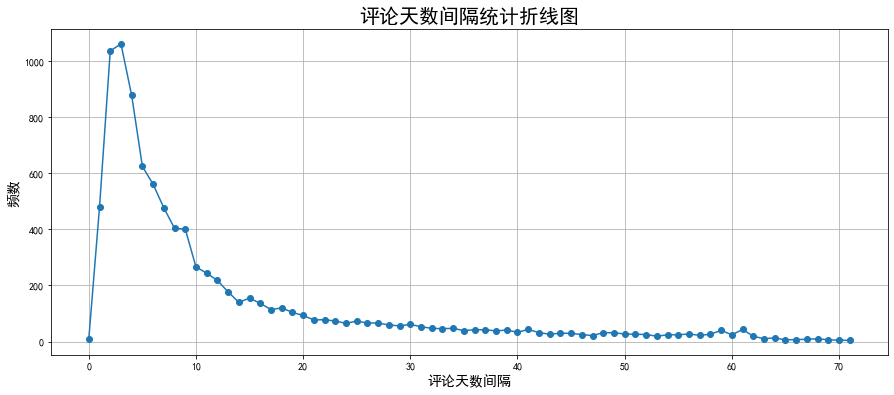

In [118]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(x, y, marker='o')
plt.xlabel("评论天数间隔", fontsize=14)
plt.ylabel("频数", fontsize=14)
plt.title("评论天数间隔统计折线图", fontsize=20)
plt.show()

In [70]:
# np.cumsum()求累计和
yy = np.cumsum(y) / np.sum(y)

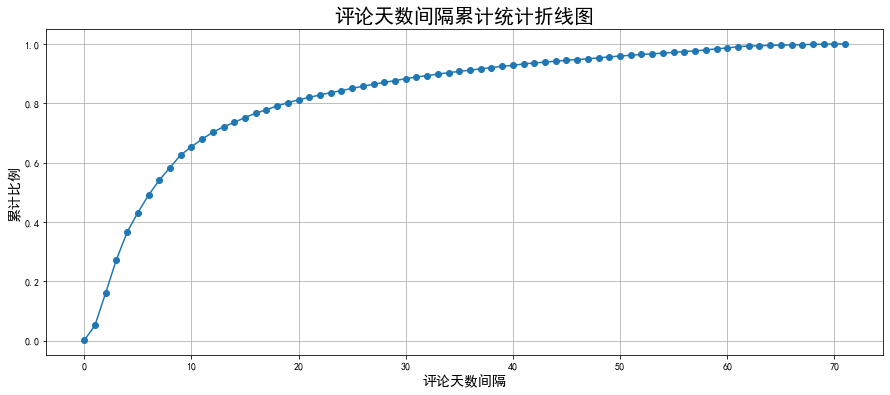

In [117]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(x, yy, marker='o')
plt.xlabel("评论天数间隔", fontsize=14)
plt.ylabel("累计比例", fontsize=14)
plt.title("评论天数间隔累计统计折线图", fontsize=20)
plt.show()

### 各品牌对比分析

In [74]:
jd_data["商品名称"].value_counts()

格力（GREE）1.5匹 云佳 新一级能效 变频冷暖 自清洁 壁挂式空调挂机KFR-35GW/NhGc1B                     4340
美的(Midea) 1.5匹 风酷 新一级能效 变频冷暖 自清洁 壁挂式空调挂机 京东小家智能家电 KFR-35GW/N8XHC1         1702
美的(Midea) 大1匹 风酷 新一级能效 变频冷暖 自清洁 壁挂式空调挂机 京东小家智能家电  KFR-26GW/N8XHC1          989
TCL 1.5匹新一级变频 电量可视化 以旧换新 壁挂式 挂式空调挂机KFRd-35GW/D-STA11Bp(B1) 京东小家智能生态        649
美的(Midea) 1.5匹 风酷 新能效 变频冷暖 自清洁 壁挂式卧室空调挂机 京东小家智能家电 KFR-35GW/N8XHC3          511
小米（MI）1.5匹 新能效 变频冷暖 智能自清洁 壁挂式卧室空调挂机 KFR-35GW/N1A3 以旧换新                     480
康佳（KONKA）2匹 新能效 第四代自清洁 一键节能 变频客厅空调  立式圆柱柜机 KFR-51LW/YC3                    218
小米（MI）3匹 新能效 变频冷暖  智能自清洁 客厅圆柱空调立式柜机 KFR-72LW/N1A3 以旧换新                     212
TCL 大2匹 新一级能效 变频冷暖 空调立式 立柜式空调柜机客厅KFRd-51LW/D-JD11Bp(B1)                    180
海信(Hisense) 舒适家 3匹 新一级能效 智能自清洁三匹立式柜机客厅空调 京东小家智能生态 KFR-72LW/A390-X1         132
TCL 大3匹 新三级能效 变频冷暖 小炫风 以旧换新 空调立式 立柜式空调柜机KFRd-72LW/D-ME23Bp(B3)客厅            41
小米（MI）1.5匹空调挂机 变频冷暖一级能效 智能自清洁高颜值壁挂式客厅卧室空调节能省电臻品KFR-35GW/N1A1                10
美的(Midea)空调 智弧 1.5匹 新三级能效 变频冷暖 自清洁节能 智能家电 壁挂式家用空调挂机K

In [76]:
# 用已有列生成新的列
jd_data["品牌"] = jd_data.apply(lambda x: re.split("[ （(]", x["商品名称"])[0], axis=1)

In [79]:
jd_data["品牌"].value_counts()

格力     4340
美的     3242
TCL     890
小米      742
康佳      218
海信      132
扬子       10
云米       10
Name: 品牌, dtype: int64

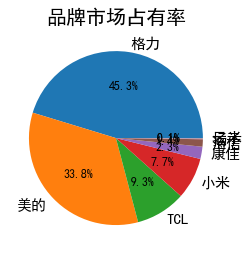

In [89]:
plot_pie(jd_data["品牌"].value_counts(), "品牌市场占有率")

In [94]:
# 计算品牌平均打分
jd_data.groupby("品牌").agg({"打分": "mean"}).sort_values("打分", ascending=False)

,打分
品牌,
云米,5.000000
扬子,5.000000
海信,4.219697
TCL,3.069663
康佳,3.059633
格力,3.046774
美的,2.522517
小米,1.904313


In [95]:
# Plus会员对各品牌的平均打分
jd_data[jd_data["会员等级"]=="Plus会员"].groupby("品牌").agg({"打分": "mean"}).sort_values("打分", ascending=False)

,打分
品牌,
云米,5.000000
扬子,5.000000
海信,3.181818
康佳,3.086957
格力,2.744681
TCL,2.738739
美的,2.170316
小米,1.397590


### 基于时间序列的分析

In [97]:
# 各品牌最早购买时间
jd_data["购买时间"].groupby(jd_data["品牌"]).min()

品牌
TCL   2021-05-29 22:22:00
云米    2022-07-23 14:05:00
小米    2021-02-28 19:37:00
康佳    2022-01-26 17:50:00
扬子    2021-10-29 11:33:00
格力    2021-03-18 00:16:00
海信    2020-10-30 22:47:00
美的    2020-08-17 21:06:00
Name: 购买时间, dtype: datetime64[ns]

In [98]:
# 各品牌最早评论时间
jd_data["评论时间"].groupby(jd_data["品牌"]).min()

品牌
TCL   2021-06-13 14:15:00
云米    2022-07-28 10:32:00
小米    2021-03-10 14:27:00
康佳    2022-02-01 00:41:00
扬子    2021-11-07 22:04:00
格力    2021-03-20 18:32:00
海信    2020-11-11 09:27:00
美的    2020-08-25 15:33:00
Name: 评论时间, dtype: datetime64[ns]

In [99]:
# 各品牌按月旬的打分情况（可以看出品牌走势）
jd_data["购买月旬"] = jd_data.apply(lambda x: pd.to_datetime(x["购买时间"]).strftime("%Y%m-%d")[:8], axis=1)

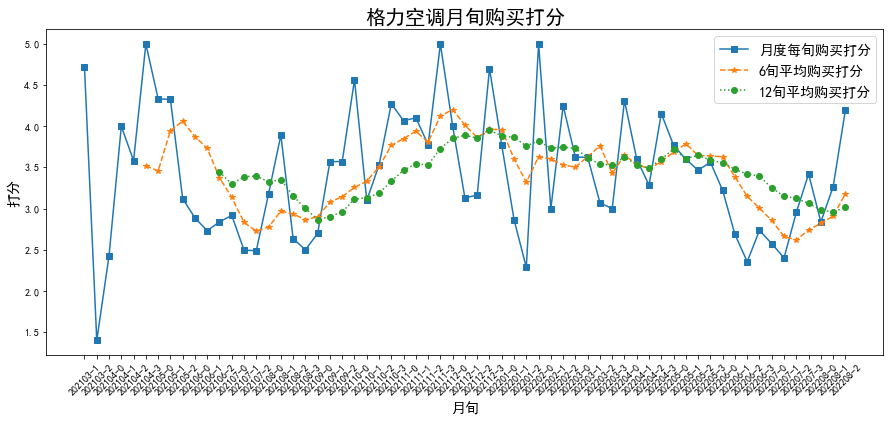

In [119]:
xy = jd_data[jd_data["品牌"]=="格力"].groupby("购买月旬").agg({"打分": "mean"})

# 移动窗口函数使用(每6旬、12旬取平均)
y2 = pd.Series.rolling(xy, 6).mean()
y3 = pd.Series.rolling(xy, 12).mean()
plt.figure(figsize=(15, 6))
plt.plot(xy.index, xy.values, marker="s", label="月度每旬购买打分")
plt.plot(xy.index, y2.values, linestyle="--", marker="*", label="6旬平均购买打分")
plt.plot(xy.index, y3.values, linestyle=":", marker="o", label="12旬平均购买打分")
plt.legend(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("月旬", fontsize=14)
plt.ylabel("打分", fontsize=14)
plt.title("格力空调月旬购买打分", fontsize=20)
plt.show()

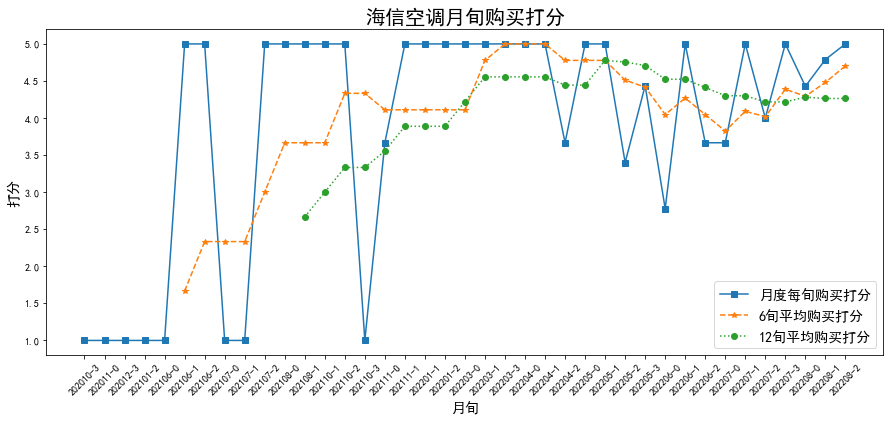

In [124]:
xy = jd_data[jd_data["品牌"]=="海信"].groupby("购买月旬").agg({"打分": "mean"})

# 移动窗口函数使用(每6旬、12旬取平均)
y2 = pd.Series.rolling(xy, 6).mean()
y3 = pd.Series.rolling(xy, 12).mean()
plt.figure(figsize=(15, 6))
plt.plot(xy.index, xy.values, marker="s", label="月度每旬购买打分")
plt.plot(xy.index, y2.values, linestyle="--", marker="*", label="6旬平均购买打分")
plt.plot(xy.index, y3.values, linestyle=":", marker="o", label="12旬平均购买打分")
plt.legend(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("月旬", fontsize=14)
plt.ylabel("打分", fontsize=14)
plt.title("海信空调月旬购买打分", fontsize=20)
plt.show()

In [123]:
# 保存分析后的数据
jd_data.to_csv("after_analysis.csv")

## 文本挖掘与分析

### 引入相关库

In [152]:
import jieba
from jieba import analyse
from snownlp import SnowNLP
import collections

In [127]:
jd_data = pd.DataFrame(pd.read_csv("after_analysis.csv", encoding="utf-8", index_col=0))

In [129]:
jd_data["评论内容"]

0        线上线下看了好几款空调，最后选择了海信空调，外观精致，性价比很高，空调到货后包装完好，师傅安...
1        这款空调超级棒！制冷效果十分给力，我们家客厅大，没想到3匹的也是完全够的，空调样式美观，大气...
2        外形外观：对于人丑还颜控的我来说绝了，不管那种装修风格都适合，金属粉？反正超级好看\n冷暖效...
3        ?外观颜值：整体比较小巧的圆柱体，金粉色和白的配色，挺好看的。\n\n?安装配送：包装完好，...
4        外形外观：圆柱的，看起来大气，不占地方\n冷暖效果：制热很快，十几分钟就能感受到屋里的热气\...
                               ...                        
13571    真的很香！噪声不大，很意外的宝贝，质量好，颜色亮，快递员当面验机，完好无损，这个颜色非常百搭...
13572    买给妈妈用的呢嘻嘻，面板很简单，方便操作，网购让生活更便利了，包装完好，高端上档次 很大气，...
13573    外形外观：挺时尚的，白色嘛，耐看，遥控器很好，一眼就能看清\n冷暖效果：制冷效果还可以，真不...
13574    很好，反应灵敏，调试顺利 使用方便，容量大容量设计好，做工特别精细，总之是一次非常好的购物。...
13575    真的很实用，功能强大，强劲，超实惠。给家里买的，牌子非常好，服务一流，操作简单明了，主要耗电...
Name: 评论内容, Length: 9584, dtype: object

### 利用情感分析库进行分析

In [131]:
# 用一条评论内容测试一下
round(SnowNLP("这款空调超级棒！制冷效果十分给力，我们家客厅大，没想到3匹的也是完全够的，空调样式美观").sentiments, 6)

0.764463

In [132]:
jd_data["SnowNLP情感得分"] = jd_data["评论内容"].apply(lambda x: round(SnowNLP(x).sentiments, 4))

In [135]:
jd_data[["打分", "SnowNLP情感得分", "评论内容"]].sample(10)

,打分,SnowNLP情感得分,评论内容
8615,3,0.2281,其他都好，安装太慢了
10359,5,0.6182,昨天下单，今天就收到货，物流非常的快，上午收到后，下午就有安装师傅来安装，大品牌值得信赖，有...
7125,1,0.9915,空调装成这样子，幸亏没有撞成稀巴烂，空调使用一般，感觉没有同价位的美的空调性价比高，功能多，...
2712,1,0.0163,没有补偿差价。托了一周没处理
838,1,0.0008,建议大家不要买小米空调，售后太差了！体验过才知道，原来很多人说小米售后差是真的！千万注意了。...
5181,2,0.0002,这个安装费我可以理解高空作业费150，但是管子每米100我不理解，难道买空调里面不包括管子吗
11253,5,0.7634,静音效果：声音很小\n节能省电：一级节能\n送货安装：送货快，安装很快，格力售后服务很好，安...
10164,5,0.0002,6月5日凌晨下的单，1.5匹新一级能效，*元一台，下单两台，保价*，6月6日中午送货上门，6...
6571,1,0.0027,什么客服嘛，问问题都听不懂，水平那么差吗
6781,1,0.2097,十五号就到家了，到今天都没有人来帮忙安装


In [136]:
# 打分与SnowNLP情感得分的对应关系
jd_data.groupby("打分").agg({"SnowNLP情感得分": "mean"}).sort_values("SnowNLP情感得分", ascending=False)

,SnowNLP情感得分
打分,
5,0.754107
4,0.276207
3,0.174498
2,0.102998
1,0.053122


In [138]:
# 各品牌的SnowNLP情感得分
jd_data.groupby("品牌").agg({"SnowNLP情感得分": "mean"}).sort_values("SnowNLP情感得分", ascending=False)

,SnowNLP情感得分
品牌,
扬子,0.906330
云米,0.745100
海信,0.574380
TCL,0.394398
格力,0.376684
康佳,0.335665
美的,0.308910
小米,0.213467


### 分词并做关键词/主题分析

In [145]:
# jieba分词并去除停用词
" ".join(jieba.cut("昨天下单，今天就收到货，物流非常的快，上午收到后，下午就有安装师傅来安装，大品牌值得信赖"))

'昨天 下单 ， 今天 就 收到 货 ， 物流 非常 的 快 ， 上午 收到 后 ， 下午 就 有 安装 师傅 来 安装 ， 大 品牌 值得 信赖'

In [142]:
stop_words = set([i.strip("\n") for i in open("stop_words.txt", encoding="utf-8")])

In [144]:
print(len(stop_words))

1893


In [146]:
def jieba_cut(sentence):
    res = []
    for w in jieba.cut(sentence):
        w = w.strip()
        if not w:
            continue
        if w not in stop_words:
            res.append(w)
    return res

In [148]:
"；".join(jieba_cut("昨天下单，今天就收到货，物流非常的快，上午收到后，下午就有安装师傅来安装，大品牌值得信赖"))

'昨天；下单；收到；货；物流；上午；收到；下午；安装；师傅；安装；品牌；值得；信赖'

In [150]:
# 提取出各品牌的评论内容，并对内容做切词
model_comment = collections.defaultdict(list)
for item in jd_data[["品牌", "评论内容"]].values:
    model_comment[item[0]].append(" ".join(jieba_cut(item[1])))

In [154]:
# 用jieba库做关键词提取，基于TF-IDF
for model, comments in model_comment.items():
    print(model, ":", " ".join(analyse.extract_tags(" ".join(comments), withWeight=False, topK=20)))

海信 : 安装 空调 效果 海信 师傅 制冷 静音 京东 外观 送货 性价比 冷暖 不错 满意 颜值 外形 客服 售后 很快 服务态度
小米 : 安装 空调 小米 师傅 京东 效果 送货 客服 制冷 售后 差评 垃圾 外观 上门 静音 服务 冷暖 外形 电话 退货
TCL : 安装 空调 制冷 效果 师傅 TCL 京东 客服 送货 外观 静音 售后 不错 冷暖 很快 费劲 满意 服务 节能 外形
美的 : 安装 空调 美的 效果 师傅 客服 京东 制冷 送货 静音 外观 售后 冷暖 差评 服务 外形 节能 不错 很快 下单
格力 : 安装 空调 效果 格力 制冷 静音 师傅 送货 京东 外观 售后 冷暖 客服 格力空调 外形 节能 不错 品牌 服务 很快
扬子 : 空调 效果 制冷 安装 外观 真的 扬子 信赖 不错 漏保 好看 外形 很棒 静音 物美价廉 三匹 节能 京东 冷暖 细心
云米 : 效果 安装 制冷 送货 外观 云米 外形 节能 空调 物流 静音 能效 冷暖 美观 产品质量 速度 声音 时尚 师傅 满意
康佳 : 安装 空调 师傅 京东 客服 售后 送货 效果 制冷 康佳 外观 静音 上门 服务 冷暖 不错 物流 安装费 外形 到货
